In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In the previous section we have removed some columns and left out with relevant columns. 

In [3]:
df = pd.read_csv('../data/processed/1_features_for_analysis.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.isna().any()

afterpay_payments           False
android_orders              False
apple_payments              False
average_discount_onoffer    False
average_discount_used       False
cancels                     False
cc_payments                 False
curvy_items                 False
days_since_last_order       False
days_since_first_order      False
desktop_orders              False
devices                     False
different_addresses         False
female_items                False
home_orders                 False
ios_orders                  False
is_newsletter_subscriber    False
items                       False
macc_items                  False
male_items                  False
mapp_items                  False
mftw_items                  False
msite_orders                False
mspt_items                  False
orders                      False
other_collection_orders     False
other_device_orders         False
parcelpoint_orders          False
paypal_payments             False
redpen_discoun

# 1.Removing potential out-liers by inspecting the distributions

The graphs in the previous section gives an indication of potential out-liers which can be removed. First define the percentile and then use it remove out-liers.

Here we use inter percentile ranges for outlier removal

In [4]:
# Removing outliers from all columns
# define percentils
pct = { 
        'android_orders'      : 99,
        'afterpay_payments'   : 99,
        'average_discount_onoffer' : 75,
        'average_discount_used'    : 75,
        'cancels'             : 99,
        'curvy_items'         : 99,
        'desktop_orders'      : 99,
        'female_items'        : 99,
        'home_orders'         : 99,
        'ios_orders'          : 99,
        'macc_items'          : 99,
        'male_items'          : 99,
        'mapp_items'          : 99,
        'mftw_items'          : 99,
        'msite_orders'        : 99,
        'mspt_items'          : 99,
        'orders'              : 99,
        'other_collection_orders' : 99,
        'other_device_orders' : 99,
        'redpen_discount_used': 99,
        'returns'             : 99,
        'revenue'             : 99,
        'sacc_items'          : 99,
        'shipping_addresses'  : 99,
        'unisex_items'        : 99,
        'vouchers'            : 99,
        'wacc_items'          : 99,
        'wapp_items'          : 99,
        'wftw_items'          : 99,
        'work_orders'         : 99,
        'wspt_items'          : 99
      }

In [5]:
# Get the inter-percentile ranges for each selected parameter
ipr = dict()
for key, value in pct.items():
    
    # Computing IPR
    P1 = np.percentile(df[key].values, 25)
    P3 = np.percentile(df[key].values, value)
    IPR = P3 - P1
    ipr[key] = [P3,IPR,0]
    
# generate thresholds 

for key, value in ipr.items():
    ipr[key][2] = (value[0]+1.5*value[1])#.reset_index(inplace=True)

ipr['android_orders'][2] = 20 
ipr['cancels'][2] = 10 
ipr['curvy_items'][2] = 20 
ipr['desktop_orders'][2] = 80
ipr['ios_orders'][2] = 80
ipr['macc_items'][2] = 50
ipr['male_items'][2] = 100
ipr['mapp_items'][2] = 80
ipr['mftw_items'][2] = 50
ipr['mspt_items'][2] = 30
ipr['orders'][2] = 200
ipr['other_collection_orders'][2] = 100
ipr['returns'][2] = 150
ipr['revenue'][2] = 250000
ipr['sacc_items'][2] = 15
ipr['unisex_items'][2] = 25
ipr['wacc_items'][2] = 50
ipr['wftw_items'][2] = 50
ipr['work_orders'][2] = 30
ipr['wspt_items'][2] = 30

## 1.1.Plotting the Fields After Outlier Removal

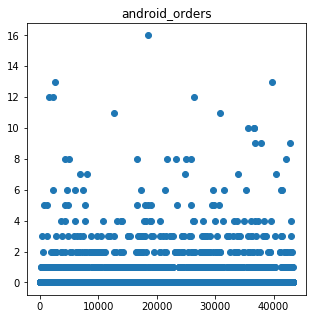

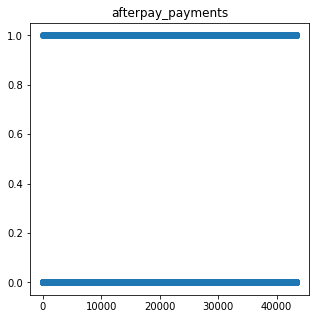

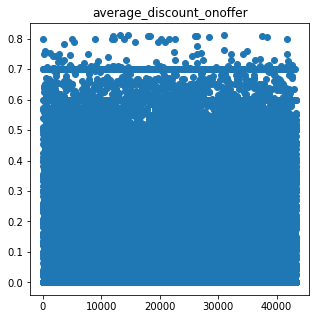

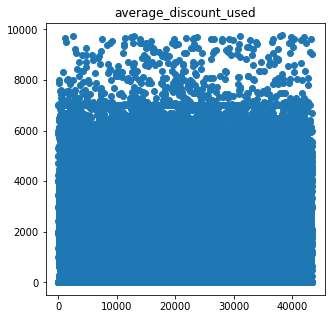

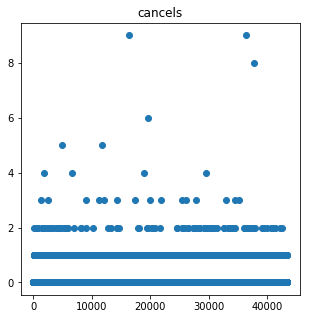

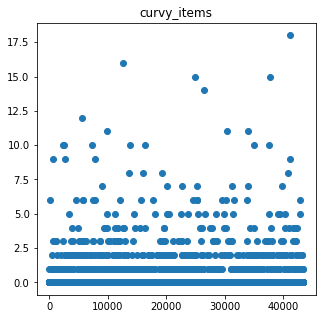

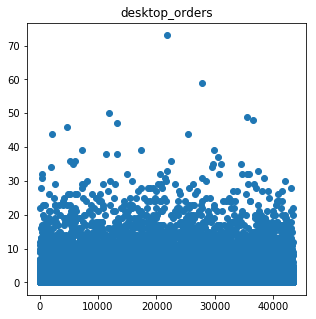

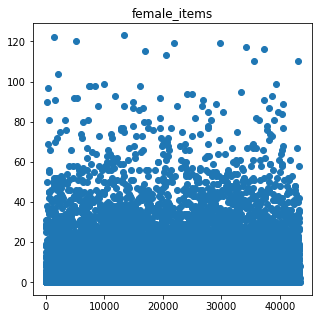

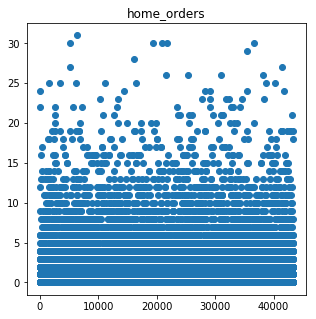

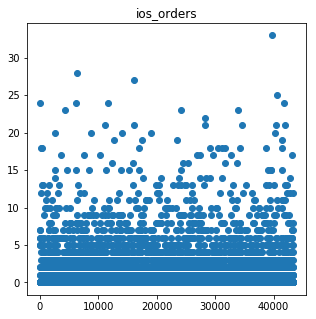

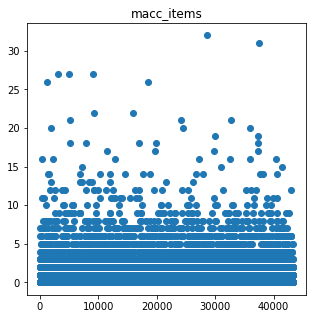

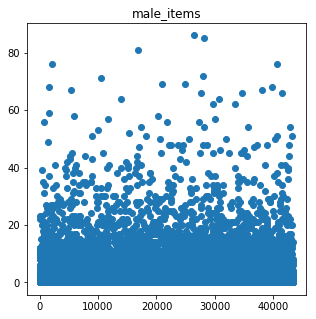

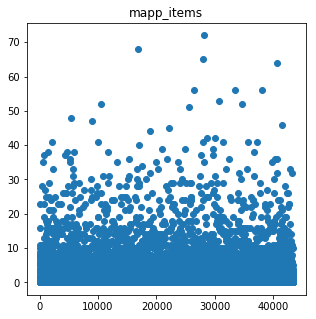

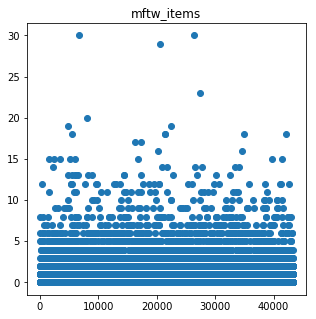

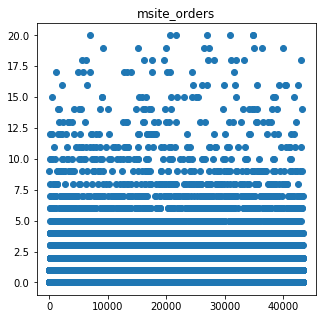

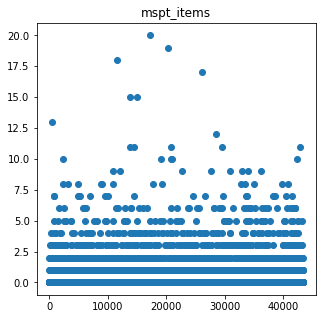

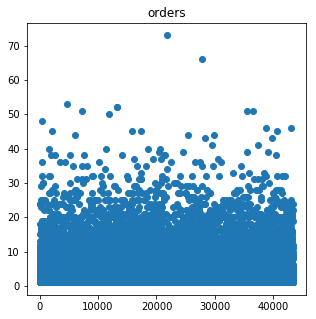

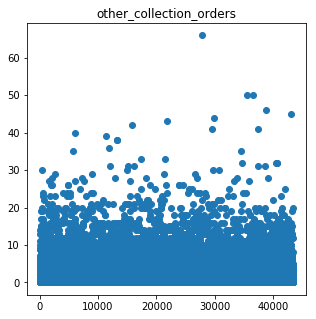

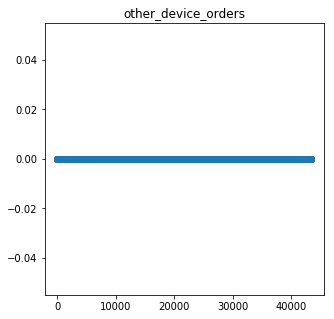

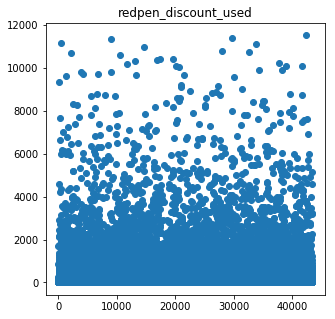

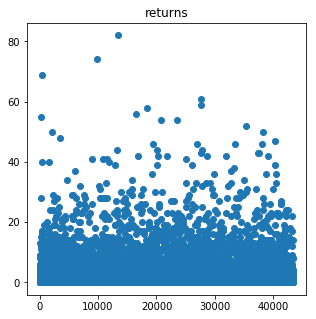

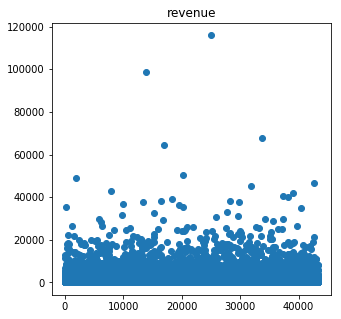

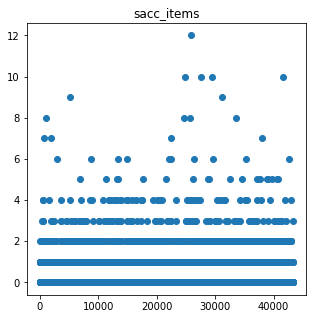

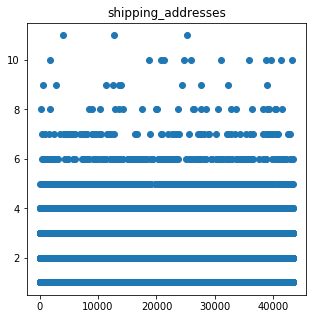

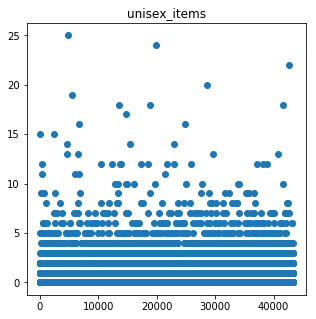

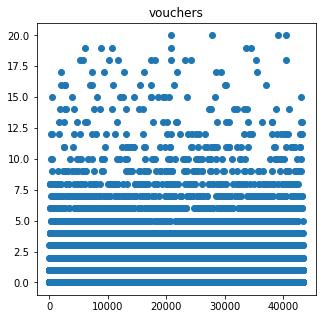

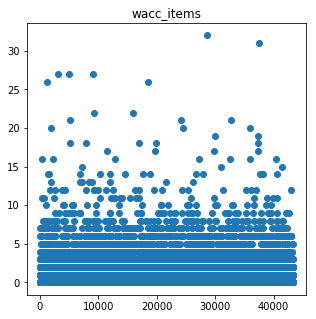

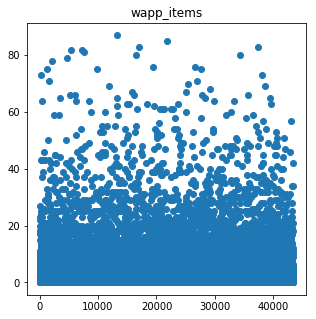

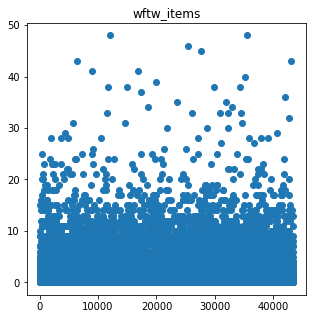

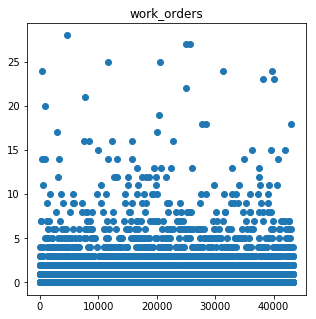

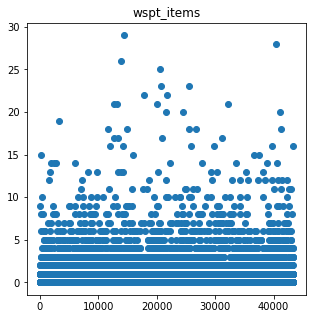

In [6]:
matplotlib.rcParams['figure.figsize'] = [5, 5]

for key, value in ipr.items():
    df  = df[df[key]<= value[2]]
    
for key, value in ipr.items():
    
    plt.figure()
    plt.title(key)
    plt.plot( df[key], marker='o', linestyle='')
    plt.show()
    
plt.close()

In [7]:
df.isna().any()

afterpay_payments           False
android_orders              False
apple_payments              False
average_discount_onoffer    False
average_discount_used       False
cancels                     False
cc_payments                 False
curvy_items                 False
days_since_last_order       False
days_since_first_order      False
desktop_orders              False
devices                     False
different_addresses         False
female_items                False
home_orders                 False
ios_orders                  False
is_newsletter_subscriber    False
items                       False
macc_items                  False
male_items                  False
mapp_items                  False
mftw_items                  False
msite_orders                False
mspt_items                  False
orders                      False
other_collection_orders     False
other_device_orders         False
parcelpoint_orders          False
paypal_payments             False
redpen_discoun

In [8]:
#df['elapsed_days'] = df['days_since_first_order'] - df['days_since_last_order'] 
df.drop('other_device_orders', inplace=True, axis=1)

Final dataset is saved as "../data/processed/2_outlier_removed_features.csv"

In [9]:
df.to_csv('../data/processed/2_outlier_removed_features.csv', index=False)